<a href="https://colab.research.google.com/github/Fr0msea/PythonImpacta/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho Final do Curso

Importar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)


QUAL A PIOR COMPANHIA

ANÁLISE DAS COMPANHIAS COM MAIS ATRASOS

1. ANÁLISE QUANTITATIVA:
------------------------------
Atraso médio por companhia:
  F9: 21.9 minutos
  FL: 20.1 minutos
  EV: 15.8 minutos
  YV: 15.6 minutos
  OO: 11.9 minutos

% de voos atrasados:
  FL: 58.1%
  F9: 57.2%
  EV: 45.2%
  MQ: 44.3%
  B6: 43.2%


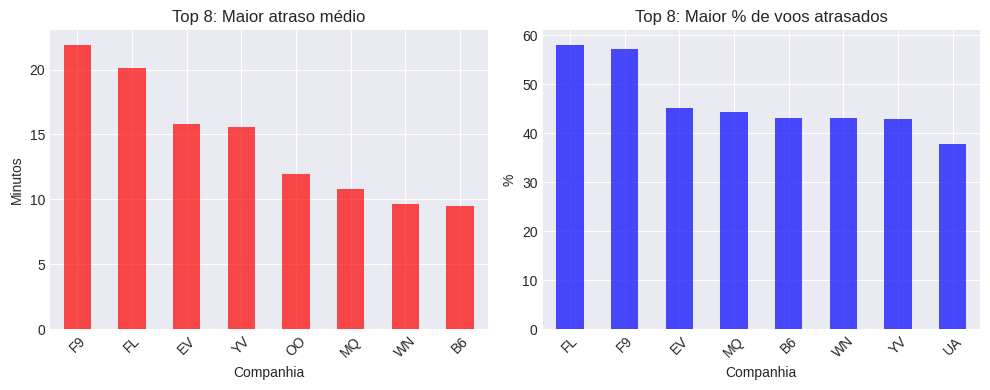


2. ANÁLISE QUALITATIVA:
------------------------------

• A pior companhia é 'F9' com 21.9 min de atraso médio
• A melhor é 'AS' com -9.9 min
• Diferença: 31.9 minutos

Possíveis causas:
• Rotas diferentes (mais ou menos congestionadas)
• Frota mais nova/antiga
• Eficiência operacional
• Horários dos voos


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv")

print("ANÁLISE DAS COMPANHIAS COM MAIS ATRASOS")
print("=" * 50)

# 1. Análise Quantitativa
print("\n1. ANÁLISE QUANTITATIVA:")
print("-" * 30)


atraso_medio = df.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False)

print("Atraso médio por companhia:")
for i, (carrier, atraso) in enumerate(atraso_medio.items()):
    if i < 5:  # Mostrar só as 5 piores
        print(f"  {carrier}: {atraso:.1f} minutos")


def calcular_pct_atrasado(x):
    return (x > 0).mean() * 100

pct_atrasado = df.groupby('carrier')['arr_delay'].apply(calcular_pct_atrasado).sort_values(ascending=False)

print("\n% de voos atrasados:")
for i, (carrier, pct) in enumerate(pct_atrasado.items()):
    if i < 5:
        print(f"  {carrier}: {pct:.1f}%")


plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
atraso_medio.head(8).plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 8: Maior atraso médio')
plt.xlabel('Companhia')
plt.ylabel('Minutos')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
pct_atrasado.head(8).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 8: Maior % de voos atrasados')
plt.xlabel('Companhia')
plt.ylabel('%')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


print("\n2. ANÁLISE QUALITATIVA:")
print("-" * 30)

pior = atraso_medio.index[0]
melhor = atraso_medio.index[-1]

print(f"\n• A pior companhia é '{pior}' com {atraso_medio[pior]:.1f} min de atraso médio")
print(f"• A melhor é '{melhor}' com {atraso_medio[melhor]:.1f} min")
print(f"• Diferença: {atraso_medio[pior] - atraso_medio[melhor]:.1f} minutos")

print("\nPossíveis causas:")
print("• Rotas diferentes (mais ou menos congestionadas)")
print("• Frota mais nova/antiga")
print("• Eficiência operacional")
print("• Horários dos voos")


A rota ou aeronave podem influenciar nos atrasos?

Top 5 rotas com maior atraso médio:
rota
EWR-CAE    44.585106
EWR-TYS    41.150160
EWR-TUL    33.659864
EWR-OKC    30.619048
EWR-RIC    25.820433
Name: arr_delay, dtype: float64

Top 5 aeronaves com maior atraso médio:
tailnum
N203FR    59.121951
N645MQ    51.000000
N956AT    47.647059
N988AT    44.342857
N521VA    42.222222
Name: arr_delay, dtype: float64

Top 5 aeronaves com menor atraso médio:
tailnum
N383HA   -14.461538
N548AA   -15.469388
N433AA   -17.090909
N423AS   -22.310345
N382HA   -23.500000
Name: arr_delay, dtype: float64


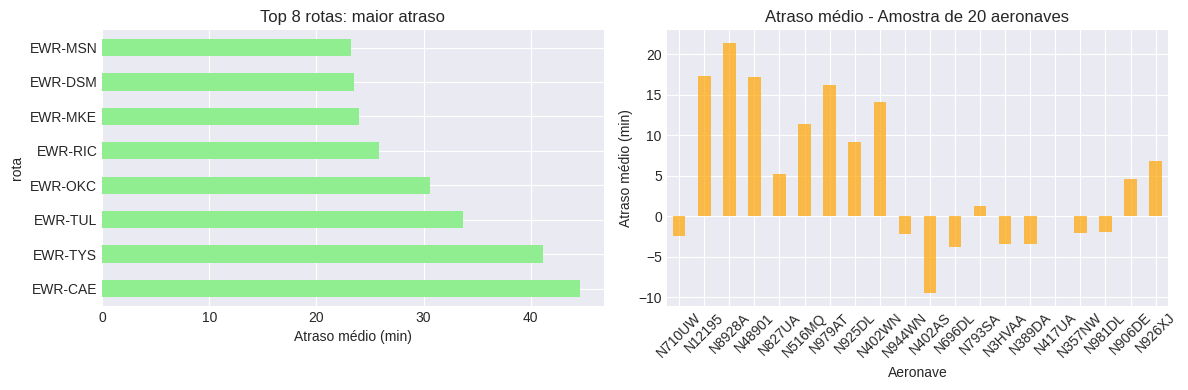


Conclusão: Algumas rotas e aeronaves têm atrasos consistentemente maiores.


In [25]:
url = "https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv"
df = pd.read_csv(url)


df['rota'] = df['origin'] + '-' + df['dest']


contagem_rotas = df['rota'].value_counts()
rotas_populares = contagem_rotas[contagem_rotas >= 50].index


atraso_rotas = df[df['rota'].isin(rotas_populares)].groupby('rota')['arr_delay'].mean().sort_values(ascending=False)

print("Top 5 rotas com maior atraso médio:")
print(atraso_rotas.head())


contagem_aeronaves = df['tailnum'].value_counts()
aeronaves_confiaveis = contagem_aeronaves[contagem_aeronaves >= 20].index

atraso_aeronaves = df[df['tailnum'].isin(aeronaves_confiaveis)].groupby('tailnum')['arr_delay'].mean().sort_values(ascending=False)

print("\nTop 5 aeronaves com maior atraso médio:")
print(atraso_aeronaves.head())

print("\nTop 5 aeronaves com menor atraso médio:")
print(atraso_aeronaves.tail())


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


atraso_rotas.head(8).plot(kind='barh', ax=ax1, color='lightgreen')
ax1.set_title('Top 8 rotas: maior atraso')
ax1.set_xlabel('Atraso médio (min)')

amostra_aeronaves = atraso_aeronaves.sample(20, random_state=42)
amostra_aeronaves.plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
ax2.set_title('Atraso médio - Amostra de 20 aeronaves')
ax2.set_xlabel('Aeronave')
ax2.set_ylabel('Atraso médio (min)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nConclusão: Algumas rotas e aeronaves têm atrasos consistentemente maiores.")

Padrões e tendências nos atrasos

Atraso médio por mês:
Mês 1: 6.1 minutos
Mês 2: 5.6 minutos
Mês 3: 5.8 minutos
Mês 4: 11.2 minutos
Mês 5: 3.5 minutos
Mês 6: 16.5 minutos
Mês 7: 16.7 minutos
Mês 8: 6.0 minutos
Mês 9: -4.0 minutos
Mês 10: -0.2 minutos
Mês 11: 0.5 minutos
Mês 12: 14.9 minutos

Horários com maior atraso:
hour
3.0     287.727273
2.0     224.650794
1.0     195.959276
0.0     120.877854
23.0     90.738113
Name: arr_delay, dtype: float64

Correlação atraso partida-chegada: 0.915


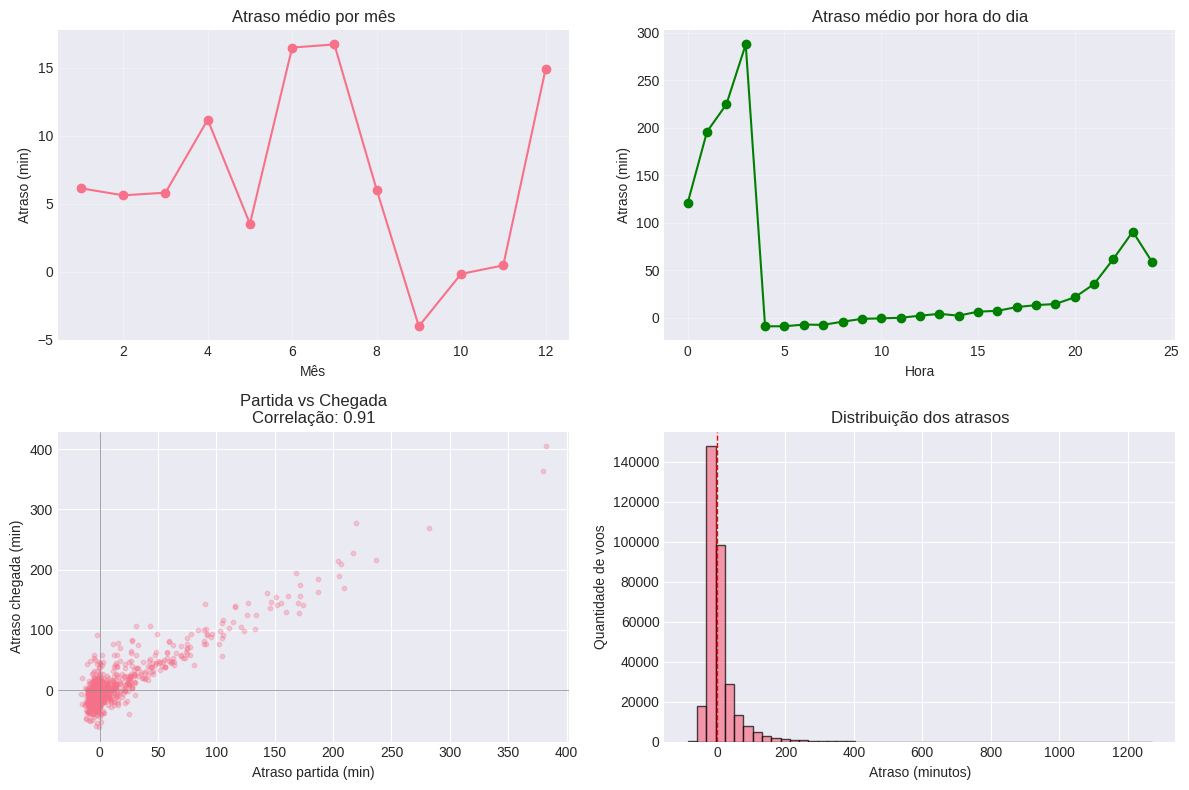

Mês mais problemático: 7 (16.7 min)
Hora mais problemática: 3.0h (287.7 min)


In [27]:
url = "https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv"
df = pd.read_csv(url)


atraso_mes = df.groupby('month')['arr_delay'].mean()

print("Atraso médio por mês:")
for mes, atraso in atraso_mes.items():
    print(f"Mês {mes}: {atraso:.1f} minutos")


atraso_hora = df.groupby('hour')['arr_delay'].mean()

print("\nHorários com maior atraso:")
print(atraso_hora.sort_values(ascending=False).head())


correlacao = df['dep_delay'].corr(df['arr_delay'])
print(f"\nCorrelação atraso partida-chegada: {correlacao:.3f}")


if 'temp' in df.columns:
    temp_corr = df['temp'].corr(df['arr_delay'])
    print(f"Correlação temperatura-atraso: {temp_corr:.3f}")


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))


ax1.plot(atraso_mes.index, atraso_mes.values, marker='o')
ax1.set_title('Atraso médio por mês')
ax1.set_xlabel('Mês')
ax1.set_ylabel('Atraso (min)')
ax1.grid(True, alpha=0.3)


ax2.plot(atraso_hora.index, atraso_hora.values, marker='o', color='green')
ax2.set_title('Atraso médio por hora do dia')
ax2.set_xlabel('Hora')
ax2.set_ylabel('Atraso (min)')
ax2.grid(True, alpha=0.3)


amostra = df.sample(1000, random_state=42)  # Amostra para não sobrecarregar
ax3.scatter(amostra['dep_delay'], amostra['arr_delay'], alpha=0.3, s=10)
ax3.set_title(f'Partida vs Chegada\nCorrelação: {correlacao:.2f}')
ax3.set_xlabel('Atraso partida (min)')
ax3.set_ylabel('Atraso chegada (min)')
ax3.axhline(y=0, color='grey', linewidth=0.5)
ax3.axvline(x=0, color='grey', linewidth=0.5)


ax4.hist(df['arr_delay'].dropna(), bins=50, alpha=0.7, edgecolor='black')
ax4.set_title('Distribuição dos atrasos')
ax4.set_xlabel('Atraso (minutos)')
ax4.set_ylabel('Quantidade de voos')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()



print(f"Mês mais problemático: {atraso_mes.idxmax()} ({atraso_mes.max():.1f} min)")
print(f"Hora mais problemática: {atraso_hora.idxmax()}h ({atraso_hora.max():.1f} min)")